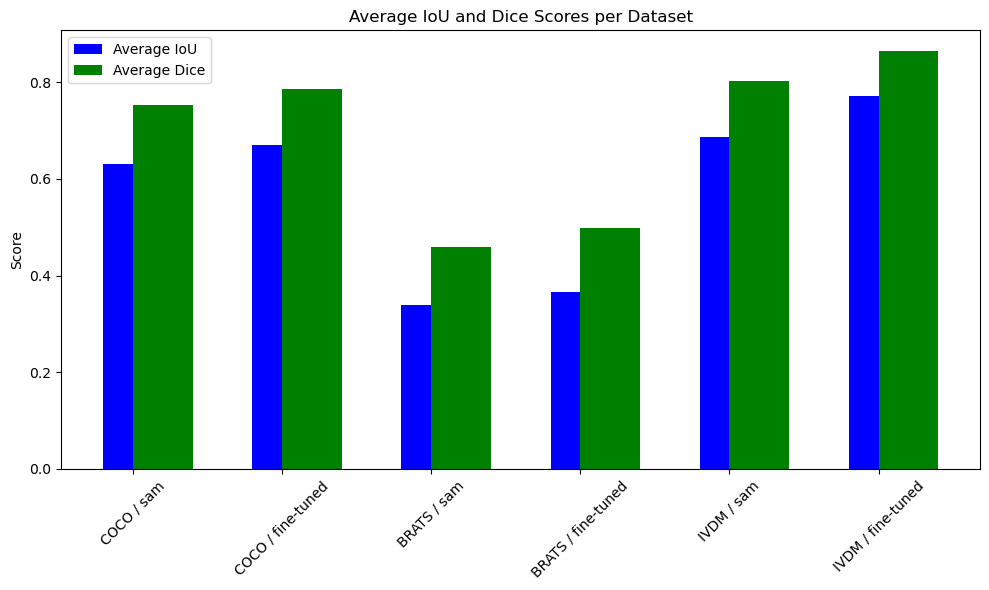

In [3]:
import matplotlib.pyplot as plt
import ast  # To parse string representation of lists/dictionaries

# 주어진 데이터를 문자열로 변환하여 파싱
data = [
    '0.631763083374652,0.7524211649485507,"[{\'gt_file_name\': \'48564_1.npy\', \'image_name\': \'48564.npy\', \'iou\': 1.2823323945667514e-13, \'dice\': 1.2823323945667514e-13}, {\'gt_file_name\': \'327592_1.npy\', \'image_name\': \'327592.npy\', \'iou\': 1.891449778919363e-13, \'dice\': 1.891449778919363e-13}]",/mnt/sda/minkyukim/sam_dataset/coco_npy_test_dataset_1024image,/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth',
    '0.6712685179865935,0.7866877731494777,"[{\'gt_file_name\': \'432898_8.npy\', \'image_name\': \'432898.npy\', \'iou\': 1.6339869735038093e-10, \'dice\': 1.6339869735038093e-10}, {\'gt_file_name\': \'377393_2.npy\', \'image_name\': \'377393.npy\', \'iou\': 1.661129567231967e-10, \'dice\': 1.661129567231967e-10}]",/mnt/sda/minkyukim/sam_dataset/coco_npy_test_dataset_1024image,/mnt/sda/minkyukim/pth/sam-tutorial_coco/medsam_model_best_point.pth',
    '0.33873955827162155,0.4593187856569111,"[{\'gt_file_name\': \'2318_T1_lbl1.npy\', \'image_name\': \'2318_T1.npy\', \'iou\': 1.040355410326932e-12, \'dice\': 1.040355410326932e-12}, {\'gt_file_name\': \'2317_T1_lbl1.npy\', \'image_name\': \'2317_T1.npy\', \'iou\': 1.0454018293387657e-12, \'dice\': 1.0454018293387657e-12}]",/mnt/sda/minkyukim/sam_dataset/brats_npy_test_dataset_1024image,/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth',
    '0.366322788472369,0.4984919522384601,"[{\'gt_file_name\': \'2333_Flair_lbl3.npy\', \'image_name\': \'2333_Flair.npy\', \'iou\': 2.515406936562381e-12, \'dice\': 2.515406936562381e-12}, {\'gt_file_name\': \'2329_Flair_lbl3.npy\', \'image_name\': \'2329_Flair.npy\', \'iou\': 2.720052265023365e-12, \'dice\': 2.720052265023365e-12}]",/mnt/sda/minkyukim/sam_dataset/brats_npy_test_dataset_1024image,/mnt/sda/minkyukim/pth/sam-tutorial_brats/medsam_model_best_point.pth',
    '0.6877371772643953,0.8035664630973156,"[{\'gt_file_name\': \'16-6_fat_3.npy\', \'image_name\': \'16-6_fat.npy\', \'iou\': 2.5258904343128386e-11, \'dice\': 2.5258904343128386e-11}, {\'gt_file_name\': \'16-16_fat_5.npy\', \'image_name\': \'16-16_fat.npy\', \'iou\': 0.005865102633833885, \'dice\': 0.011661808006465435}]",/mnt/sda/minkyukim/sam_dataset/ivdm_npy_test_dataset_1024image,/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth',
    '0.7710094097702365,0.8644404648841187,"[{\'gt_file_name\': \'16-3_fat_1.npy\', \'image_name\': \'16-3_fat.npy\', \'iou\': 0.011534024961292744, \'dice\': 0.022805016487836838}, {\'gt_file_name\': \'16-5_opp_6.npy\', \'image_name\': \'16-5_opp.npy\', \'iou\': 0.015723271295428276, \'dice\': 0.030959751456975937}]",/mnt/sda/minkyukim/sam_dataset/ivdm_npy_test_dataset_1024image,/mnt/sda/minkyukim/pth/sam-tutorial_ivdm/medsam_model_best_point.pth'
]

# 데이터셋 이름
dataset_names = [
    "COCO / sam",
    "COCO / fine-tuned",
    "BRATS / sam",
    "BRATS / fine-tuned",
    "IVDM / sam",
    "IVDM / fine-tuned"
]

# 데이터 파싱 함수
def parse_data(data):
    avg_iou, avg_dice, worst_cases_str, dataset_path, checkpoint_path = data.split(",")[:5]
    return {
        "avg_iou": float(avg_iou),
        "avg_dice": float(avg_dice),
    }

# 데이터 파싱
parsed_data = [parse_data(d) for d in data]

# 평균 IoU와 Dice 값 시각화
avg_ious = [d['avg_iou'] for d in parsed_data]
avg_dices = [d['avg_dice'] for d in parsed_data]

# 그래프 그리기
x = range(len(parsed_data))

plt.figure(figsize=(10, 6))
plt.bar(x, avg_ious, width=0.4, label="Average IoU", align='center', color='blue')
plt.bar(x, avg_dices, width=0.4, label="Average Dice", align='edge', color='green')
plt.xticks(x, dataset_names, rotation=45)
plt.ylabel("Score")
plt.title("Average IoU and Dice Scores per Dataset")
plt.legend()
plt.tight_layout()
plt.show()
